In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

Below is a code snippet from my data processing file which takes an image downsizes it to 512x512, reshapes the dimesions and creates the sobel representation

### Issue:
When I plot the processed sobel data (stored in the rescaled_sobel variable) in matplotlib, the result is different from the unprocessed data (stored in sobelx_values variable). I would expect plotting the unprocessed and processed sobel data to look the same. See plots below. 

In [2]:
intensity_image = cv2.imread('C:/Users/beali/OneDrive/Documents/Mines academics/Independent Study Spring 2025/Sheet_1_000_X001_Y001_G001_A001_I.tiff') # load in 1024x1024x3 image
down_samp = cv2.resize(intensity_image, (512,512), interpolation=cv2.INTER_LINEAR) # downsize image to 512x512x3
reshaped_intensity = np.mean(down_samp, axis=-1) # Average the color channels together (size 512x512)
image_array = np.expand_dims(reshaped_intensity, axis=-1) # change shape to 512x512x1
rescaled_array = image_array/255.0 # do min max normalization


# get sobel values
sobelx_values = cv2.Sobel(src=down_samp, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # get sobelx values from down_samp
reshaped_sobel = np.mean(sobelx_values, axis=-1) # average color channels
sobelx_array = np.expand_dims(reshaped_sobel, axis=-1) # change shape to 512x512x1
# do min max normalization
max_sobel = np.max(reshaped_sobel) # get max sobel value
min_sobel = np.min(reshaped_sobel) # get min sobel value
rescaled_sobel = (sobelx_array-min_sobel)/(max_sobel-min_sobel) # perform normalization



In [12]:
min_sobel

-6882.0

In [ ]:
while True:
    cv2.imshow("Sheep", rescaled_sobel)
    cv2.waitKey(0)
    sys.exit()

cv2.destroyAllWindows()

In [6]:
sobelx_array.shape

(512, 512, 1)

In [4]:
for row in sobelx_values[0]:
    check1 = np.all(row==row[0])
    check2 = np.all(sobelx_array==row[0])
    if check1 == False:
        print("check1 is false")
    if check2 == False:
        print("check2 is false")

check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 is false
check2 i

In [8]:
reshaped_sobel

array([[   0.,  854.,  754., ..., -240.,  -66.,    0.],
       [   0.,  627.,  784., ..., -359., -166.,    0.],
       [   0., -365.,  165., ..., -465., -180.,    0.],
       ...,
       [   0.,  607.,  376., ..., -291., -188.,    0.],
       [   0.,  691.,  437., ..., -124.,  -74.,    0.],
       [   0.,  770.,  536., ...,  -94.,  -24.,    0.]])

In [7]:
sobelx_array

array([[[   0.],
        [ 854.],
        [ 754.],
        ...,
        [-240.],
        [ -66.],
        [   0.]],

       [[   0.],
        [ 627.],
        [ 784.],
        ...,
        [-359.],
        [-166.],
        [   0.]],

       [[   0.],
        [-365.],
        [ 165.],
        ...,
        [-465.],
        [-180.],
        [   0.]],

       ...,

       [[   0.],
        [ 607.],
        [ 376.],
        ...,
        [-291.],
        [-188.],
        [   0.]],

       [[   0.],
        [ 691.],
        [ 437.],
        ...,
        [-124.],
        [ -74.],
        [   0.]],

       [[   0.],
        [ 770.],
        [ 536.],
        ...,
        [ -94.],
        [ -24.],
        [   0.]]])

In [10]:
rescaled_sobel

array([[[0.4835242 ],
        [0.54352561],
        [0.53649968],
        ...,
        [0.46666198],
        [0.47888709],
        [0.4835242 ]],

       [[0.4835242 ],
        [0.52757676],
        [0.53860746],
        ...,
        [0.45830113],
        [0.47186117],
        [0.4835242 ]],

       [[0.4835242 ],
        [0.45787958],
        [0.49511698],
        ...,
        [0.45085365],
        [0.47087754],
        [0.4835242 ]],

       ...,

       [[0.4835242 ],
        [0.52617157],
        [0.50994168],
        ...,
        [0.46307876],
        [0.47031546],
        [0.4835242 ]],

       [[0.4835242 ],
        [0.53207335],
        [0.5142275 ],
        ...,
        [0.47481206],
        [0.47832502],
        [0.4835242 ]],

       [[0.4835242 ],
        [0.53762383],
        [0.52118317],
        ...,
        [0.47691983],
        [0.48183798],
        [0.4835242 ]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-6882.0..7351.0].


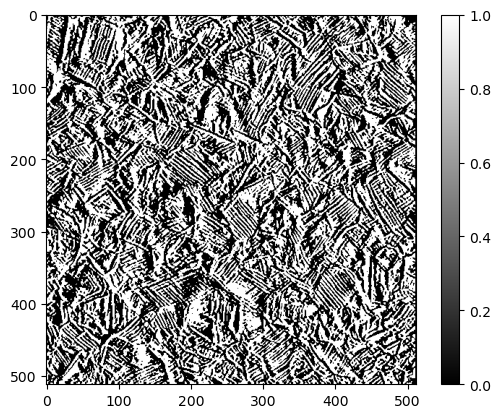

In [12]:
# unprocessed sobel data
plt.imshow(sobelx_values, cmap='grey')
plt.colorbar()

(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 6.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 6.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 3.000e+0

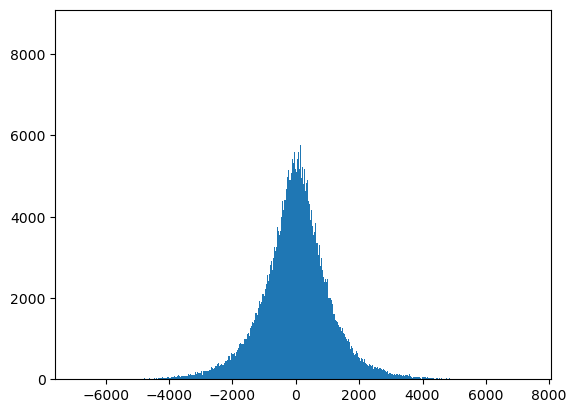

In [13]:
plt.hist(sobelx_values.flatten(), bins = 1000)

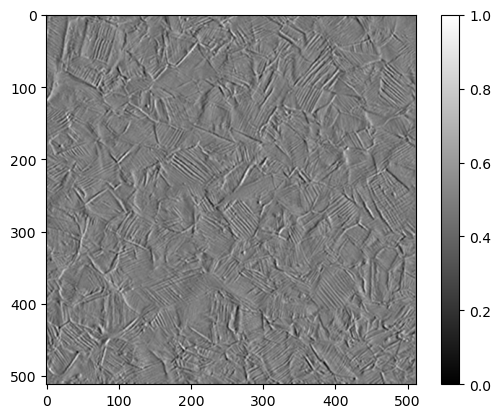

In [20]:
# processed sobel data
plt.imshow(np.round(rescaled_sobel,2), cmap='grey')
plt.colorbar()

In [21]:
np.round(rescaled_sobel,2)

array([[[0.48],
        [0.54],
        [0.54],
        ...,
        [0.47],
        [0.48],
        [0.48]],

       [[0.48],
        [0.53],
        [0.54],
        ...,
        [0.46],
        [0.47],
        [0.48]],

       [[0.48],
        [0.46],
        [0.5 ],
        ...,
        [0.45],
        [0.47],
        [0.48]],

       ...,

       [[0.48],
        [0.53],
        [0.51],
        ...,
        [0.46],
        [0.47],
        [0.48]],

       [[0.48],
        [0.53],
        [0.51],
        ...,
        [0.47],
        [0.48],
        [0.48]],

       [[0.48],
        [0.54],
        [0.52],
        ...,
        [0.48],
        [0.48],
        [0.48]]])

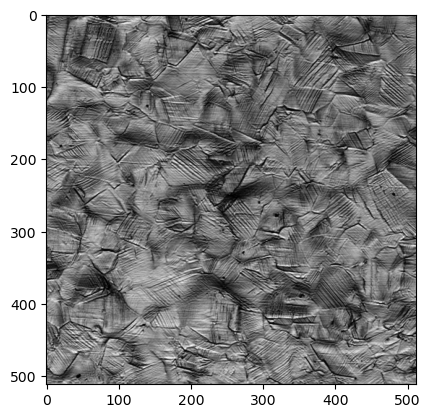

In [16]:
# 512x512 version of origninal image
plt.imshow(reshaped_intensity, cmap='grey')